<a href="https://colab.research.google.com/github/ElhorriAbdelBasset/PyTorch-Fundemantals/blob/main/PyTorch_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'1.13.0+cu116'

## Data Generation

In [ ]:
weight = 0.8 
bias = 0.9

start = 0
end = 10
step = 0.05
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight*X+bias
noise = torch.randn((len(Y),1)) * 1.2
Y = Y + noise

In [ ]:
train_test_split = int(len(X)*0.8)
X_train, Y_train = X[:train_test_split], Y[:train_test_split]
X_test, Y_test = X[train_test_split:], Y[train_test_split:]
len(X_train), len(X_test), len(Y_train), len(Y_test)

(160, 40, 160, 40)

In [ ]:
X.shape, Y.shape

(torch.Size([200, 1]), torch.Size([200, 1]))

In [ ]:
def plot_things(X_train, Y_train, X_test, Y_test, test_preds=None, train_preds=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, Y_train, c='b', label="Trainnig Data")
  plt.scatter(X_test, Y_test, c='r', label="Testing Data")
  if test_preds != None:
    plt.scatter(X_test, test_preds.detach().numpy(), c="g", label="Test Predicitons")
  if train_preds != None:
    plt.scatter(X_train, train_preds.detach().numpy(), c="g", label="Train Predicitons")

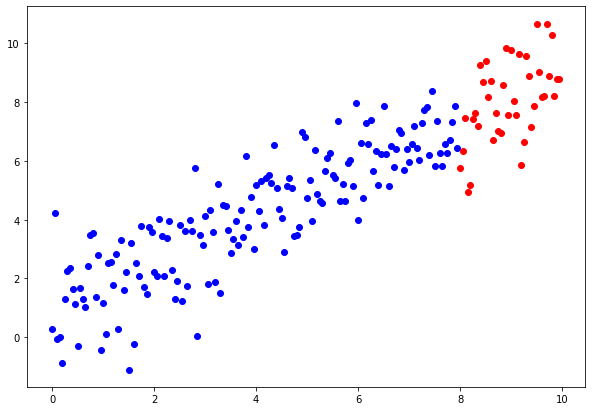

In [ ]:
plot_things(X_train, Y_train, X_test, Y_test)

## Model Building

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weight * X + self.bias

In [ ]:
model = LinearModel()
preds = model.forward(X_test)

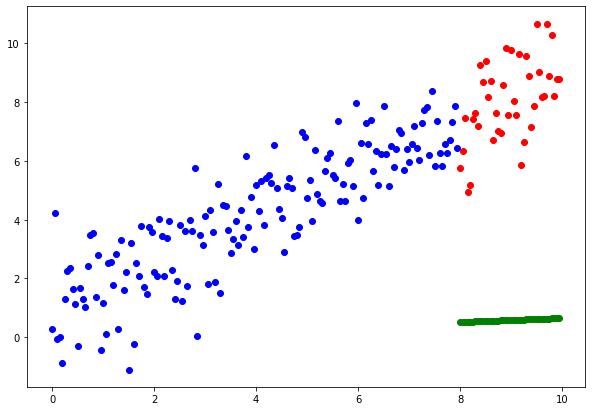

In [ ]:
plot_things(X_train, Y_train, X_test, Y_test, preds)

In [ ]:
epochs = 100

epoch_count = []
train_loss = []
test_losses = []
optimizer =  torch.optim.SGD(model.parameters(), lr=0.1)
losss = nn.L1Loss()

for epoch in range(epochs):
  model.train()
  preds = model(X_train)
  loss = losss(preds, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = losss(test_preds, Y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss.append(loss.detach().numpy())
    test_losses.append(test_loss.detach().numpy())
    print(f"Epoch {epoch}: Train Loss {loss}, Test Loss {test_loss}")

Epoch 0: Train Loss 3.9670448303222656, Test Loss 3.9222781658172607
Epoch 10: Train Loss 0.9398813247680664, Test Loss 1.1097419261932373
Epoch 20: Train Loss 0.9284898638725281, Test Loss 1.0738551616668701
Epoch 30: Train Loss 0.9194186329841614, Test Loss 1.070077657699585
Epoch 40: Train Loss 0.9131959080696106, Test Loss 1.0418570041656494
Epoch 50: Train Loss 0.9075860977172852, Test Loss 1.028352975845337
Epoch 60: Train Loss 0.9041007161140442, Test Loss 1.0202291011810303
Epoch 70: Train Loss 0.9050130844116211, Test Loss 1.007662057876587
Epoch 80: Train Loss 0.9003686904907227, Test Loss 1.0515471696853638
Epoch 90: Train Loss 0.9008020162582397, Test Loss 0.9944165945053101


Text(0.5, 1.0, 'Loss Decrease With Respect To Epochs')

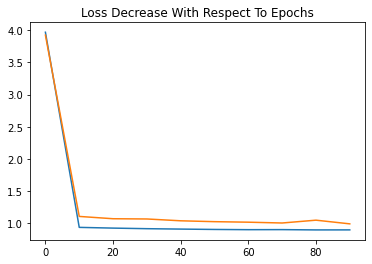

In [ ]:
plt.plot(epoch_count, train_loss, label="Train Loss")
plt.plot(epoch_count, test_losses, label="Test Loss")
plt.title("Loss Decrease With Respect To Epochs")

In [ ]:
train_preds = model(X_train)
test_preds = model(X_test)

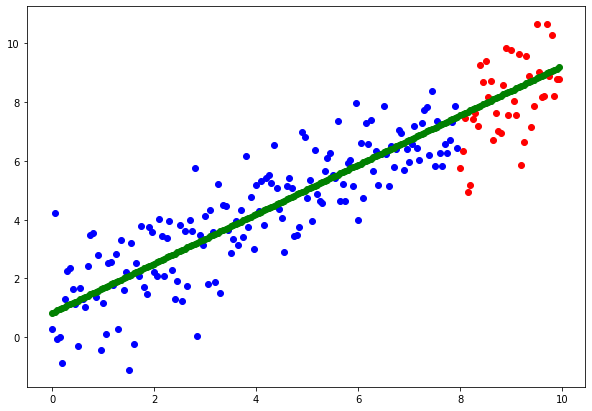

In [ ]:
plot_things(X_train, Y_train, X_test, Y_test, test_preds=test_preds, train_preds=train_preds)

If you want to save your model, then run this.

```
torch.save(obj=model.state_dict(), f="Your Path")
```

